In [31]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/rksla/Downloads/adult.data"

data = pd.read_csv(
    path,
    header=None, index_col=False,
    names=[
        "age", "workclass", "fnlwgt", "education", "education-num",
        "martial-status", "occupation", "relationship", "race", "gender",
        "capital-gain", "capital-loss", "hours-per-week", "native-country",
        "income"
    ]
)

data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [6]:
data_dummies = pd.get_dummies(data)

data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [7]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[ : , "age" : "occupation_ Transport-moving"]
X = features.values
y = data_dummies["income_ >50K"].values

In [10]:
X.shape, y.shape

((32561, 44), (32561,))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

0.8092371944478566

In [12]:
demo_df = pd.DataFrame(
    {
        '숫자특성': [0, 1, 2, 1],
        '범주형특성': ['양말', '여우', '양말', '상자']
    }
)

demo_df

,숫자특성,범주형특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [13]:
pd.get_dummies(demo_df)

,숫자특성,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [14]:
demo_df['숫자특성'] = demo_df['숫자특성'].astype(str)

pd.get_dummies(demo_df)

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit_transform(demo_df)

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [16]:
ohe.get_feature_names()

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_0', 'x0_1', 'x0_2', 'x1_상자', 'x1_양말', 'x1_여우'], dtype=object)

In [17]:
ohe.get_feature_names_out()

array(['숫자특성_0', '숫자특성_1', '숫자특성_2', '범주형특성_상자', '범주형특성_양말', '범주형특성_여우'],
      dtype=object)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

In [20]:
X_train_trans

array([[ 1.49894077, -0.44509689,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.38045121, -1.66848877,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2501343 , -0.03729959,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.14559057, -0.03729959,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.47051192,  0.3704977 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99867216,  0.61517608,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
X_train_trans.shape

(24420, 44)

In [23]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [24]:
X_test_trans = ct.transform(X_test)

In [25]:
logreg.score(X_test_trans, y_test)

0.808991524382754

In [26]:
ct.named_transformers_

{'scaling': StandardScaler(), 'onehot': OneHotEncoder(sparse=False)}

In [27]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

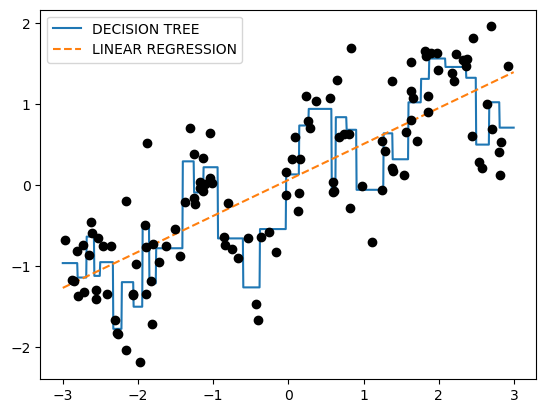

In [33]:
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DECISION TREE")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LINEAR REGRESSION")

plt.plot(X[ : , 0], y, 'o', c='k')

plt.legend(loc='best')

In [34]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [35]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [41]:
X[ : 5].ravel()

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816])

In [42]:
X_binned.toarray()[ : 5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)

X_binned = kb.transform(X)

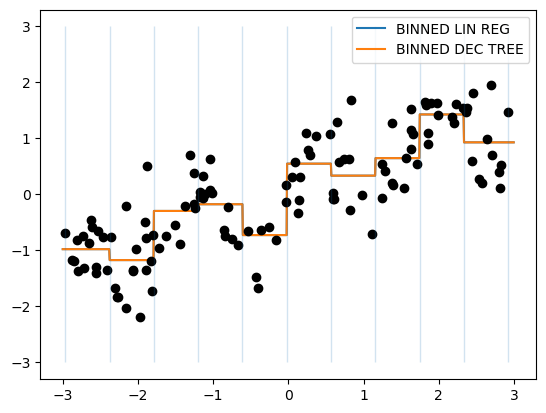

In [44]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='BINNED LIN REG')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='BINNED DEC TREE')

plt.plot(X[ : , 0], y, 'o', c='k')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)

plt.legend(loc='best')

plt.show()

In [45]:
X_combined = np.hstack([X, X_binned])
X_combined

array([[-0.75275929,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.70428584,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.39196365,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.88057965,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.35535399,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23605345,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
X_combined.shape

(120, 11)

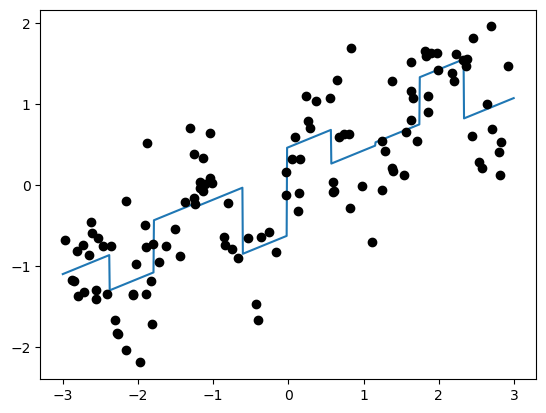

In [48]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='COMBINED')

plt.plot(X[ : , 0], y, 'o', c='k')

In [49]:
X_product = np.hstack([X_binned, X * X_binned])
X_product

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        , ...,  1.39196365,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.35535399],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
X_product.shape

(120, 20)

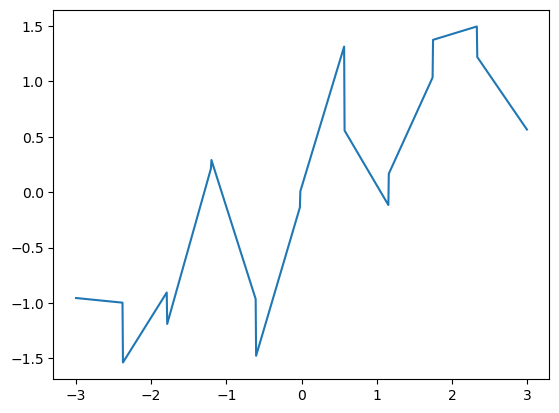

In [51]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='PRODUCT')

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

In [53]:
X_poly.shape

(120, 10)

In [54]:
X[ : 5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [55]:
X_poly[ : 5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [57]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

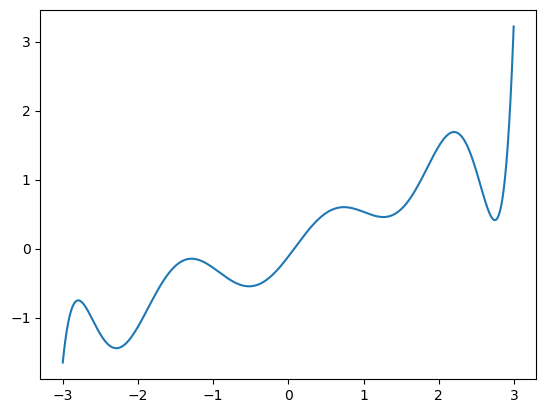

In [58]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='POLY')

plt.show()

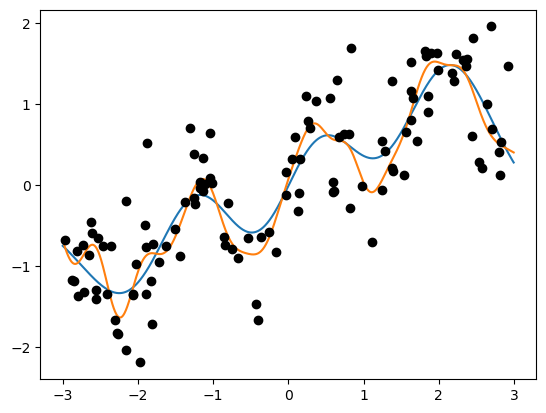

In [59]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR GAMMA={}'.format(gamma))

plt.plot(X[ : , 0], y, 'o', c='k')

In [60]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [61]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [63]:
X_train.shape, X_train_poly.shape

((379, 13), (379, 105))

In [65]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.5768611445540043

In [70]:
ridge = Ridge().fit(X_train_poly, y_train)
ridge.score(X_test_poly, y_test)

0.7411219642018821

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.785231209287454

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
rf.score(X_test_poly, y_test)

0.7607681010412639